In [1]:
# example of using random forest for fitting
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [40]:
def makedata(seed=1234):
    np.random.seed(seed)
    N = 20
    f = lambda x : 2*x + 1
    x = np.linspace(0, 10, 100)
    y = f(x) + 2.*np.random.normal(size=x.size)
    arg = np.zeros(x.size, '?')
    arg[np.random.choice(np.arange(x.size), replace=False, size=6*x.size//10)] =True
    train = x[arg], y[arg]
    test  = x[~arg], y[~arg]
    return train, test

In [41]:
train, test = makedata()

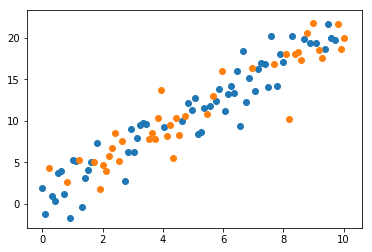

In [42]:
for d in [train, test]:
    plt.scatter(d[0], d[1])

In [64]:
# RF
regr = RandomForestRegressor(max_depth=2, random_state=0, verbose=1, n_estimators=2)
regr.fit(train[0][:,np.newaxis], train[1])

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
           oob_score=False, random_state=0, verbose=1, warm_start=False)

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


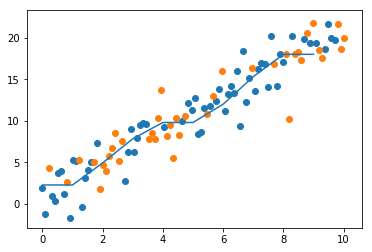

In [65]:
for d in [train, test]:
    plt.scatter(d[0], d[1])
xg = np.arange(0, 10)[:,np.newaxis]
plt.plot(xg, regr.predict(xg))